In [ ]:
pip install openai

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
/Users/hanma/development/idea-propose/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hanma/development/idea-propose/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hanma/development/idea-propose/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hanma/development/idea-propose/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byte

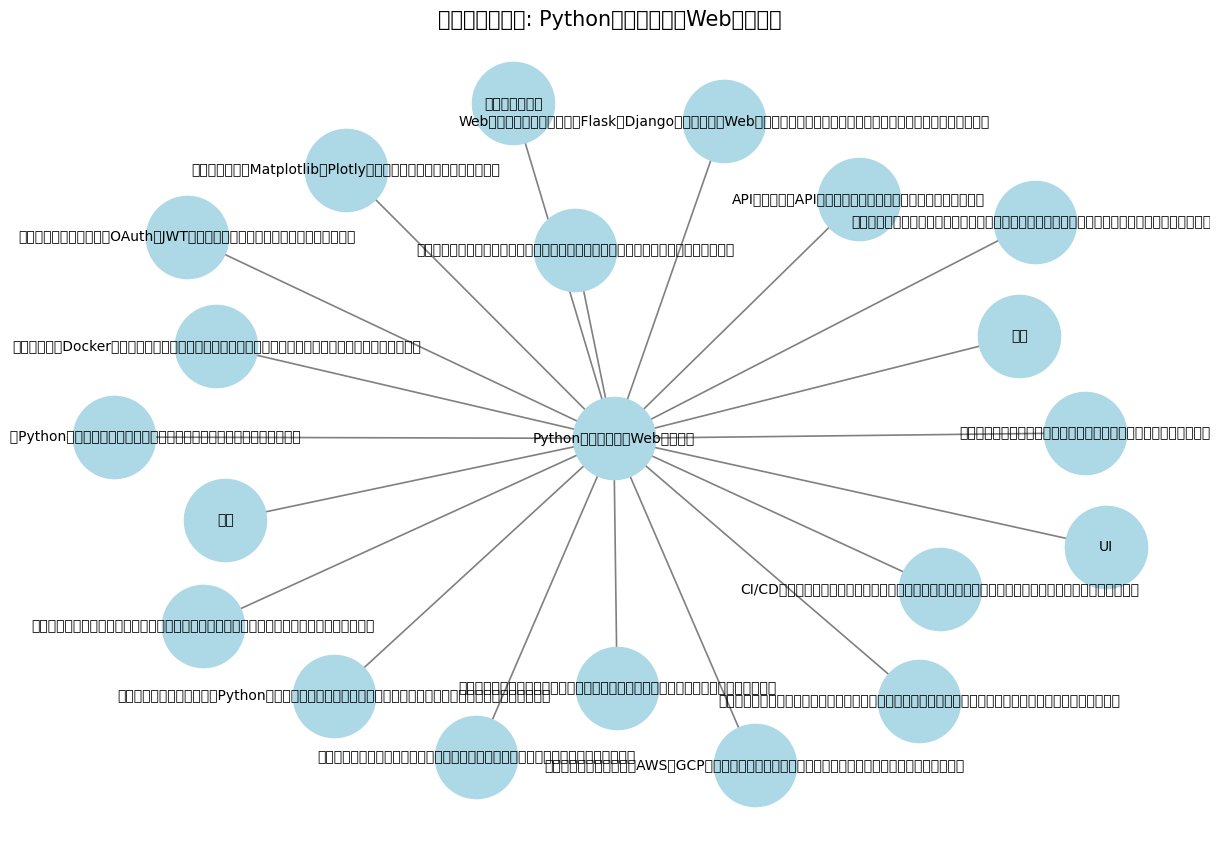

In [ ]:
import openai
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import os
from os.path import join, dirname
from dotenv import load_dotenv

dotenv_path = join('.env')
load_dotenv(dotenv_path)

API_KEY = os.environ.get("API_KEY")
# ✅ OpenAI クライアントの作成
client = openai.Client(api_key=OPENAI_API_KEY)  # 修正 ✅

# ✅ OpenAI クライアント作成
client = openai.Client(api_key=API_KEY)

# ✅ マインドマップ生成プロンプト
mindmap_prompt = """
あなたは創造的な発想を支援するAIです。
以下のルールに従って、アイデアをマインドマップ形式で提案してください。

【テーマ】{user_idea}

1. 主要カテゴリを **4~5個** 提案してください。（例: 機能, UI, 技術, ビジネスモデル など）
2. 各カテゴリについて、 **3~5個のサブアイデア** を展開してください。
3. サブアイデアには、 **具体的な説明を1文追加** してください。

出力形式:
- {user_idea}
  - [カテゴリ1]
    - [サブアイデア1]（説明）
    - [サブアイデア2]（説明）
  - [カテゴリ2]
    - [サブアイデア1]（説明）
    - [サブアイデア2]（説明）
"""

# ✅ アイデアのテーマをユーザー入力
user_idea = input("💡 アイデアのテーマを入力してください: ")

# ✅ GPT にアイデア生成を依頼
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "あなたはアイデア発想を支援するAIです。"},
        {"role": "user", "content": mindmap_prompt.replace("{user_idea}", user_idea)}
    ],
    max_tokens=700,
    temperature=0.7
)

# ✅ 出力結果をパース
generated_text = response.choices[0].message.content.strip()
lines = generated_text.split("\n")

# ✅ NetworkXでマインドマップ作成
G = nx.Graph()
root = user_idea  # ユーザーの入力をルートノードにする
G.add_node(root)

parent = root
for line in lines[1:]:
    line = line.strip()
    if line.startswith("- "):
        parent = line.strip("- ")
        G.add_edge(root, parent)
    elif line.startswith("  - "):
        child = line.strip("  - ")
        G.add_edge(parent, child)

# ✅ 位置を調整して、ノード同士の距離を広げる
pos = nx.spring_layout(G, seed=42, k=1.2)  # `k` を大きくすると距離が広がる

# ✅ 日本語フォントを適用
plt.rcParams['font.family'] = "IPAexGothic"

# ✅ マインドマップの描画
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray",
        node_size=3500, font_size=10, width=1.2)  # ノードサイズとフォントサイズを調整
plt.title(f"マインドマップ: {user_idea}", fontsize=15)
plt.show()


In [6]:
print(generated_text)

- PythonプログラムをWebで動かす
  - 機能
    - リアルタイムデータ処理（Pythonプログラムがリアルタイムでデータを受信し、即座に処理結果を返す機能）
    - ユーザー認証システム（OAuthやJWTを利用した安全なユーザー認証機能の実装）
    - API連携（外部APIと連携し、データの取得や送信を行う機能）
    - データ可視化（MatplotlibやPlotlyを使ったデータのグラフ表示機能）
  
  - UI
    - インタラクティブダッシュボード（ユーザーがデータを操作できるダッシュボードを提供）
    - レスポンシブデザイン（スマートフォンやタブレットでも見やすいデザインを実現）
    - フォーム入力機能（ユーザーがデータを入力するための使いやすいフォームを作成）
    - ユーザーフィードバック機能（ユーザーがアプリの使い勝手を評価できるフィードバックフォームを設置）
  
  - 技術
    - Webフレームワークの選定（FlaskやDjangoなど、適切なWebフレームワークを選定し、プロジェクトに応じた機能を実装）
    - コンテナ化（Dockerを用いて、アプリケーションをコンテナとしてデプロイし、環境の一貫性を保つ）
    - クラウドサービス利用（AWSやGCPなどのクラウドサービスを利用して、スケーラブルなアプリを構築）
    - CI/CDパイプラインの設定（継続的インテグレーションとデリバリーを自動化して、開発効率を向上）
  
  - ビジネスモデル
    - サブスクリプションモデル（定期的に料金を支払うことで、ユーザーに継続的なサービスを提供）
    - フリーミアムモデル（基本機能は無料で提供し、高度な機能を有料で提供する戦略）
    - 広告収入（アプリ内に広告を表示し、収益を得るビジネスモデル）
    - 教育プラットフォーム（Pythonを学ぶための教材やコースを提供し、受講料を収益源とする）
